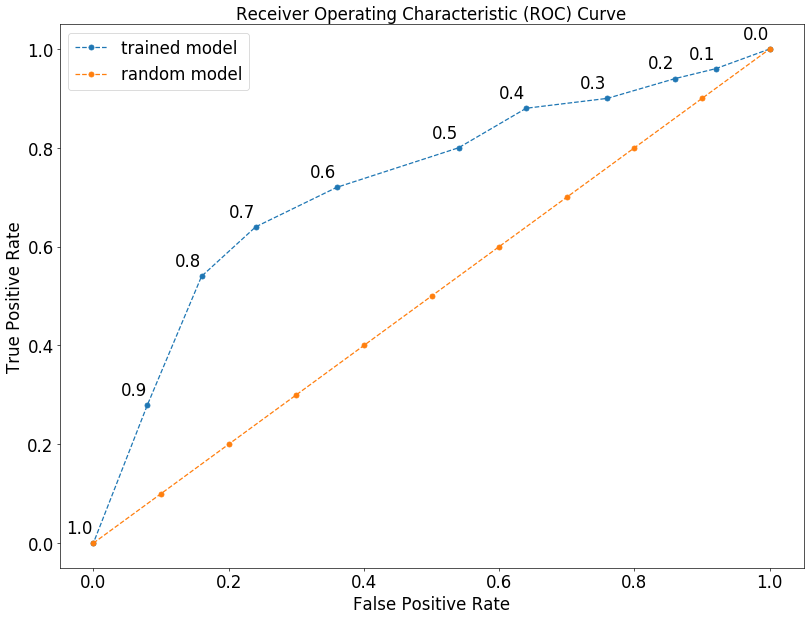

AUC DIAGONAL LINE:  0.5
AUC FOR THE OTHER CURVE:  0.7278


In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from matplotlib.pyplot import figure

# Since this is just an example, the values are selected manually
# values: [TP, FP, TN, FN]
threshold_to_values = {
    0.0: [500, 500, 0, 0],
    0.1: [480, 460, 40, 20],
    0.2: [470, 430, 70, 30],
    0.3: [450, 380, 120, 50],
    0.4: [440, 320, 180, 60],
    0.5: [400, 270, 230, 100],
    0.6: [360, 180, 320, 140],
    0.7: [320, 120, 380, 180],
    0.8: [270, 80, 420, 230],
    0.9: [140, 40, 460, 360],
    1.0: [0, 0, 500, 500],
}

actual_labels = [0] * 500 + [1] * 500
true_positive_rate = []
false_positive_rate = []

# true_positive_rate = true_positives / (true_positives + false_negatives)
# false_positive_rate = false_positives / (false_positives + true_negatives)
for threshold, values in threshold_to_values.items():
  true_positive_rate.append(values[0] / (values[0] + values[3]))
  false_positive_rate.append(values[1] / (values[1] + values[2]))

thresholds = list(threshold_to_values.keys())

figure(num=None, figsize=(16, 12), dpi=60, facecolor='w', edgecolor='k')
plt.plot(false_positive_rate, true_positive_rate, linestyle="--", marker="o")
# The diagonal line
plt.plot(thresholds, thresholds, linestyle="--", marker="o")
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=20)
plt.legend(["trained model", "random model"], fontsize=20)
for threshold, t, f in zip(thresholds, true_positive_rate, false_positive_rate):
  plt.annotate(threshold, (f-0.04, t+0.02), fontsize=20)
plt.show()

auc_score = auc(false_positive_rate, true_positive_rate)
auc_diagonal = auc(thresholds, thresholds)

print("AUC DIAGONAL LINE: ", auc_diagonal)
print("AUC FOR THE OTHER CURVE: ", auc_score)